(80, 513)


/tmp/ipykernel_2118485/2056269898.py:7: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.filters.mel(16000, 1024, 80, 0, 8000)


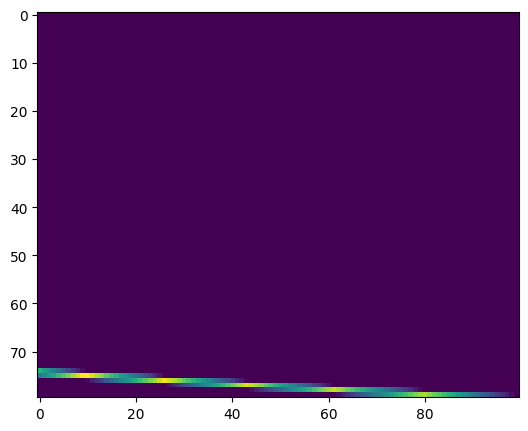

In [7]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

wav = np.load('/ZFS4T/tts/data/Tacotron2_16k/wavs/000001.npy')
mel = librosa.filters.mel(16000, 1024, 80, 0, 8000)
print(mel.shape)
plt.figure(figsize = (10, 5))
plt.imshow(mel[:, -100:])

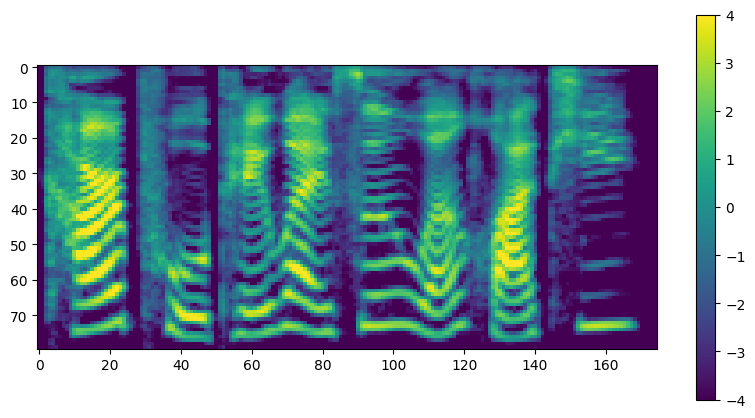

In [10]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

mel = np.load('/ZFS4T/tts/data/Tacotron2_16k/features/000001.npy')
plt.figure(figsize = (10, 5))
plt.imshow(np.flipud(mel.T))
plt.colorbar()

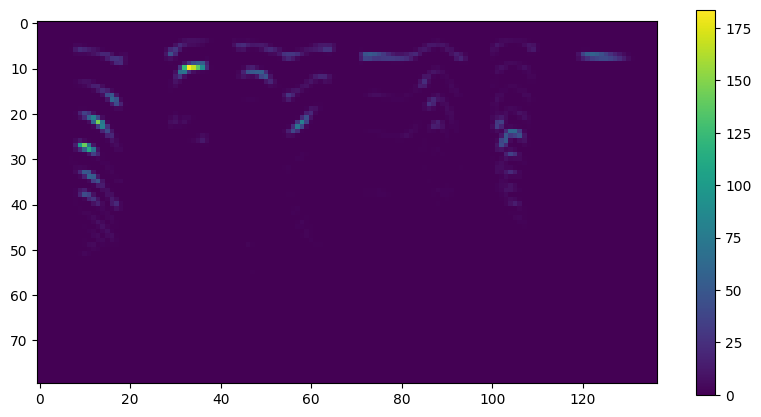

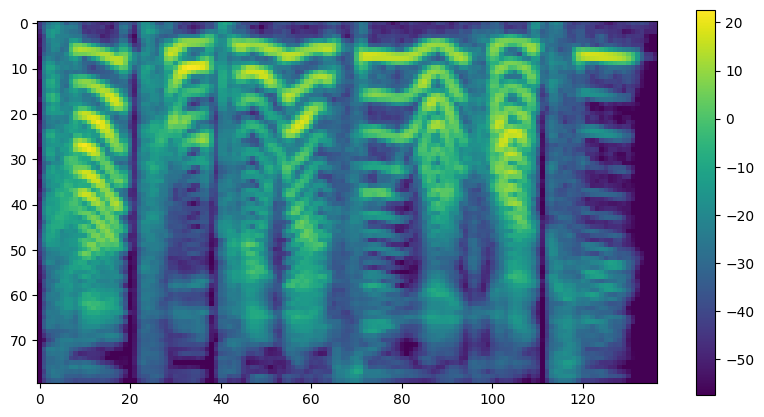

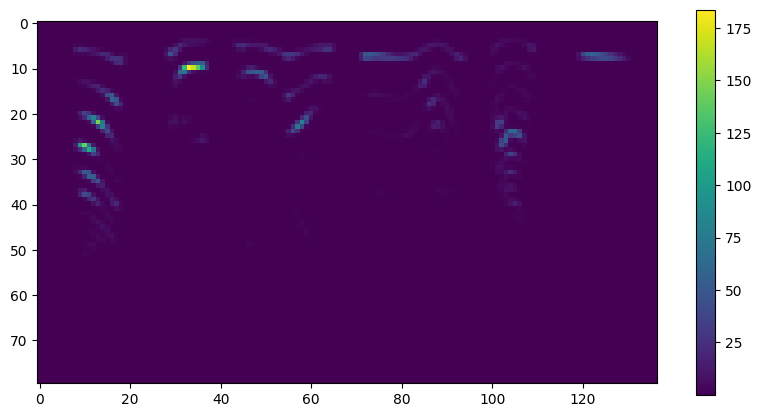

In [35]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

wav = np.load('/ZFS4T/tts/data/Tacotron2_16k/wavs/000001.npy')
fbank = librosa.feature.melspectrogram(
    y = wav,
    sr = 16000,
    n_fft = 1024,
    win_length = 1024,
    hop_length = 256,
    n_mels = 80,
    fmin = 0,
    fmax = 8000
)

plt.figure(figsize = (10, 5), num = 1)
plt.imshow(fbank)
plt.colorbar()

log_fbank = librosa.power_to_db(fbank)
plt.figure(figsize = (10, 5), num = 2)
plt.imshow(log_fbank)
plt.colorbar()

new_bank = librosa.db_to_power(log_fbank)
plt.figure(figsize = (10, 5), num = 3)
plt.imshow(new_bank)
plt.colorbar()

/tmp/ipykernel_2118485/173466786.py:9: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.filters.mel(16000, 1024, 80, 0, 8000)


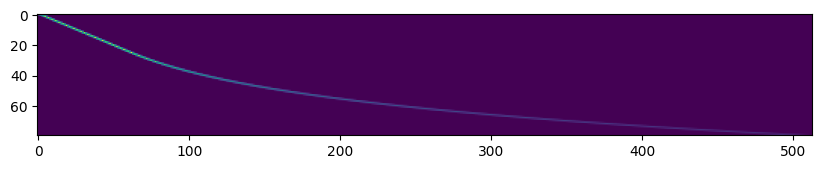

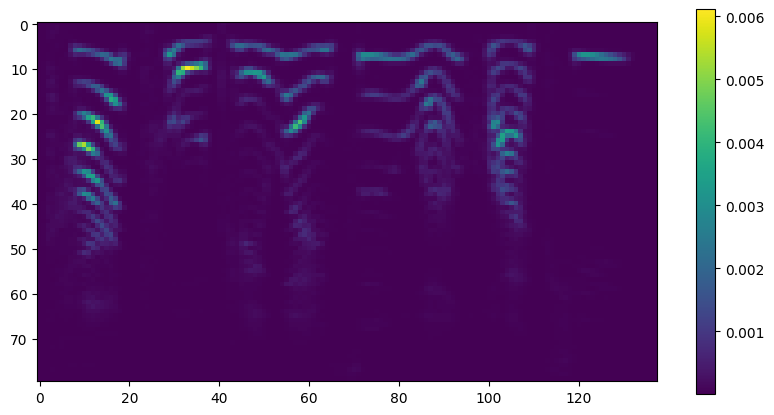

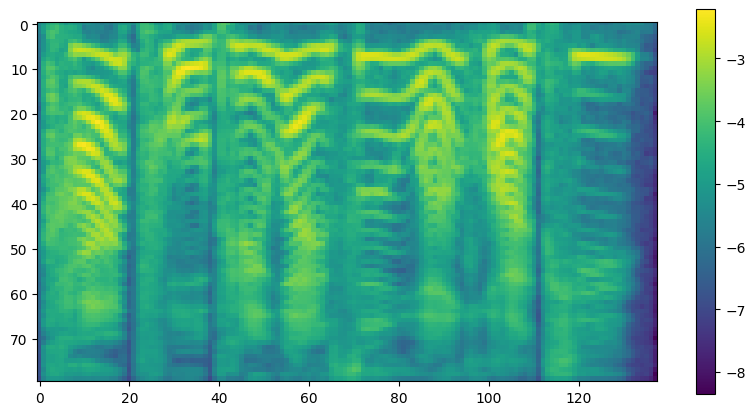

In [36]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

wav = np.load('/ZFS4T/tts/data/Tacotron2_16k/wavs/000001.npy')

mel = librosa.filters.mel(16000, 1024, 80, 0, 8000)
plt.figure(figsize = (10, 5), num = 1)
plt.imshow(mel)

stft = signal.stft(wav, fs = 16000, nperseg = 1024, noverlap = 1024 - 256)
stft_abs = np.abs(stft[-1])
mel_sp = np.dot(mel, stft_abs)
plt.figure(figsize = (10, 5), num = 2)
plt.imshow(mel_sp)
plt.colorbar()

log_mel_sp = np.log10(mel_sp)
plt.figure(figsize = (10, 5), num = 3)
plt.imshow(log_mel_sp)
plt.colorbar()

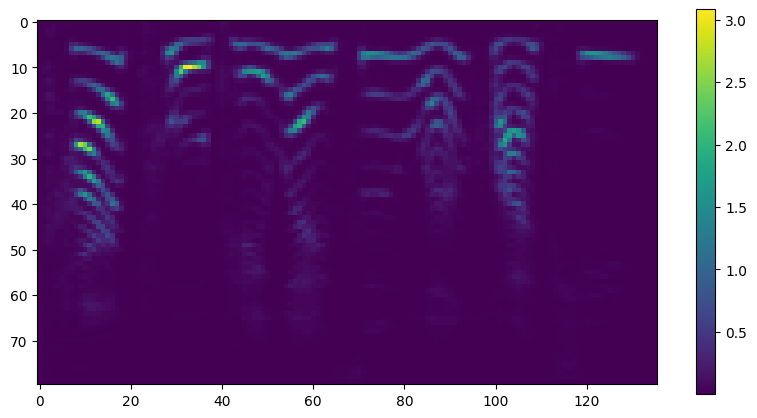

In [34]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

data = np.load('./exam.npy')[0]
plt.figure(figsize = (10, 5), num = 1)
plt.imshow(data)
plt.colorbar()
plt.show()

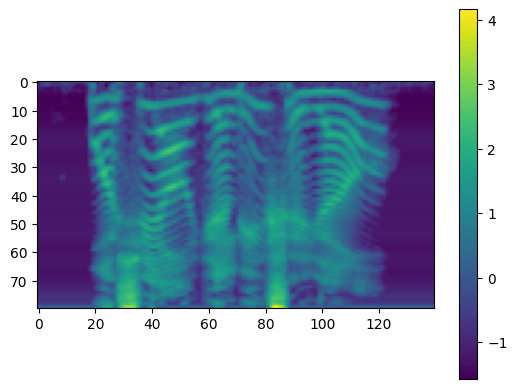

In [45]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

mean_std = np.load('/ZFS4T/tts/data/Hifi_GAN/static.npy', allow_pickle=True)
data = np.load('/ZFS4T/tts/data/Hifi_GAN/feature/000716.npy', allow_pickle=True)
plt.imshow(data)
plt.colorbar()

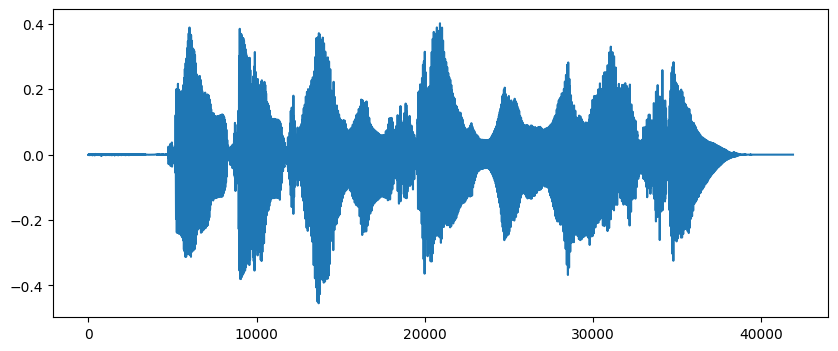

In [48]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

wav = sf.read('/ZFS4T/tts/data/Hifi_GAN/wave/000038.wav')[0]
plt.figure(figsize = (10, 4))
plt.plot(wav)
plt.show()

In [66]:
import numpy as np
import soundfile as sf

wav = sf.read('/ZFS4T/tts/data/Hifi_GAN/wave/000001.wav')[0]
print(wav.shape[0])

42560


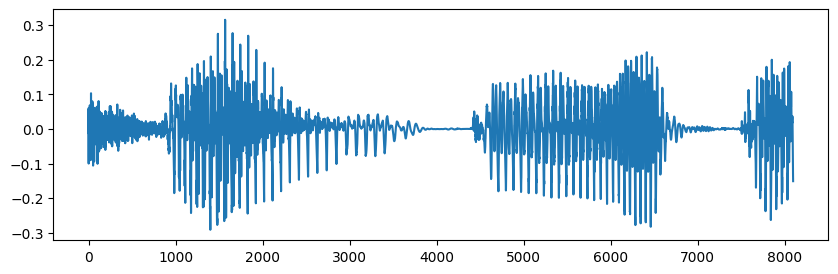

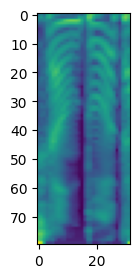

In [70]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

mel = np.load('./mel.npy', allow_pickle=True)
audio = np.load('./audio.npy', allow_pickle=True)
plt.figure(figsize = (10, 3), num = 1)
plt.plot(audio)
plt.figure(figsize = (10, 3), num = 2)
plt.imshow(mel)


In [38]:
import torch

a = torch.randn(1, 512, 32)
nn = torch.nn.ConvTranspose1d(512, 256, 16, 8, padding=4)
b = nn(a)
print(b.size())

torch.Size([1, 256, 256])


In [40]:
256 * 8 * 2

4096

In [16]:
import torch

a = torch.randn(12, 80, 4)
nn = torch.nn.ConvTranspose1d(80, 40, 3, 2, padding = 1)
b = nn(a)
print(b.size())

torch.Size([12, 40, 7])


In [31]:
import torch

a = torch.randn(1, 256, 496)
nn = torch.nn.Conv1d(256, 256, 7, 1, dilation = 1, padding=3)
b = nn(a)
nn1 = torch.nn.Conv1d(256, 256, 7, 1, dilation=1, padding = 3)
c = nn1(b)
print(b.shape)
print(c.shape)

torch.Size([1, 256, 496])
torch.Size([1, 256, 496])


In [50]:
import torch

a = torch.randn(1, 12, 456, 2)
nn = torch.nn.Conv2d(12, 12, (5, 1), (3, 1), padding = (2, 0))
b = nn(a)
print(b.shape)

torch.Size([1, 12, 152, 2])


In [1]:
3.3 * 213

702.9

In [4]:
import scipy.signal as signal
import numpy as np
import glob, tqdm

for pth in tqdm.tqdm(glob.glob('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/feature_tr/*')):
    data = np.load(pth)


100%|██████████| 10000/10000 [00:12<00:00, 771.51it/s]


In [3]:
import time

time.sleep(1)
print('heel')

heel


In [1]:
import numpy as np

data = np.load('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/test_save/48000/out.mel.npy')
print(data.shape)

(80, 303)


(80, 163)
(80, 163)
(80, 163)


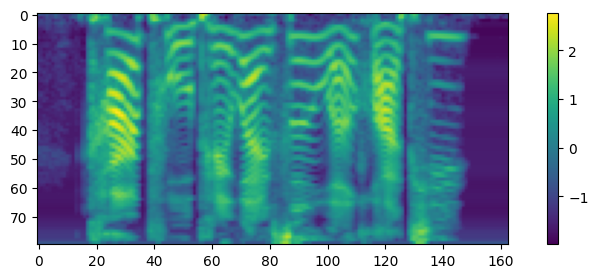

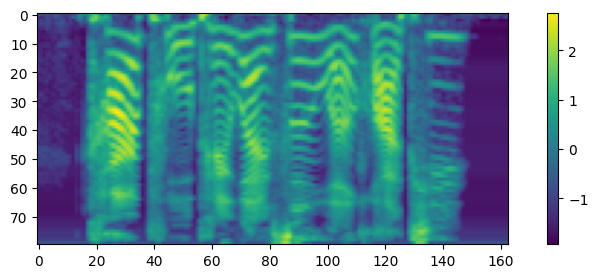

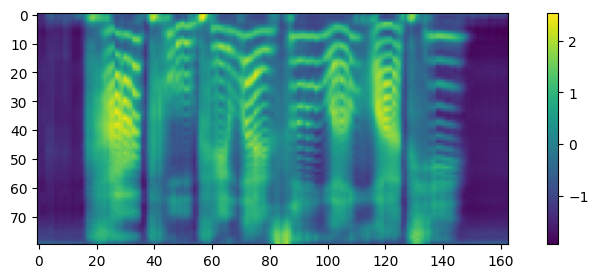

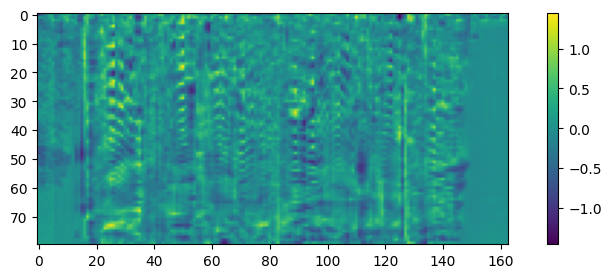

In [13]:
import numpy as np
import matplotlib.pyplot as plt

raw = np.load('/mnt/home/rex/Uhangy/.cuda-11.7/.tmp4/.tmp1/.tmp9/tts/Hifi_GAN/codes/tmp.npy', allow_pickle=True).astype(float)
new = np.load('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/feature_gta/000001.npy')
aaa = np.load('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/feature_tr/000001.npy')
dif = new - raw

print(aaa.shape)
print(raw.shape)
print(new.shape)

plt.figure(figsize = (10, 3), num = 0)
plt.imshow(aaa)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 1)
plt.imshow(raw)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 2)
plt.imshow(new)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 3)
plt.imshow(dif)
plt.colorbar()

In [19]:
import shutil, glob, tqdm, os

for pth in tqdm.tqdm(glob.glob('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/feature_gta_cv/*.npy')):
    target_file = os.path.join('/ZFS4T/tts/data/Hifi_GAN/finetune/feature_cv', 
                               '%06d_gta.npy'%(int(os.path.basename(pth).split('.npy')[0]) + 9900))
    shutil.copyfile(pth, target_file)

100%|██████████| 90/90 [00:04<00:00, 20.88it/s]


In [14]:
import soundfile as sf

_, sr = sf.read('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/wave_tr/000001.wav')
print(sr)

16000


(80, 163)
(80, 132)
(80, 132)
float32
float64


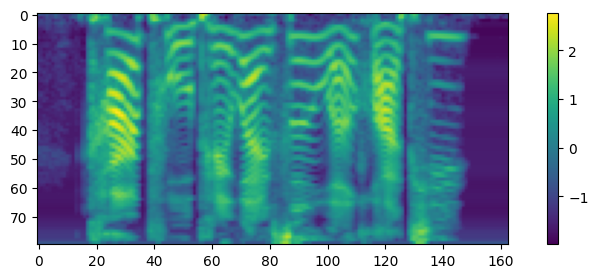

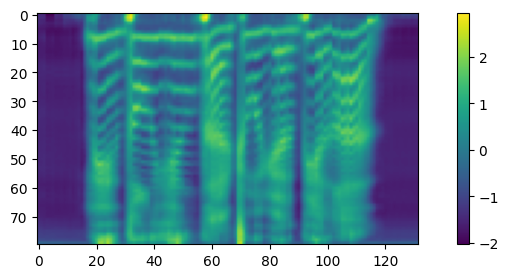

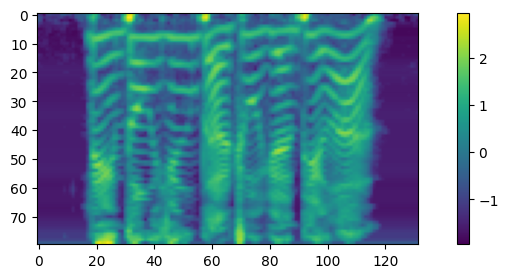

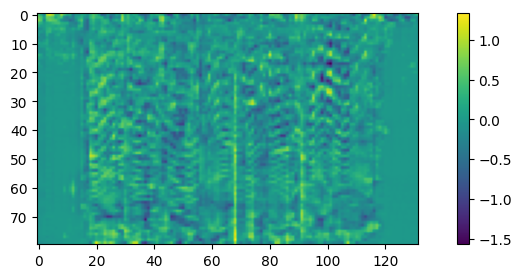

In [22]:
import numpy as np
import matplotlib.pyplot as plt

raw = np.load('/ZFS4T/tts/data/Hifi_GAN/finetune/feature_tr/000048_gta.npy')
new = np.load('/ZFS4T/tts/data/Hifi_GAN/finetune/feature_tr/000048.npy')
aaa = np.load('/ZFS4T/tts/data/Hifi_GAN/Tacotron2/feature_tr/000001.npy')
dif = new - raw

print(aaa.shape)
print(raw.shape)
print(new.shape)
print(raw.dtype)
print(new.dtype)

plt.figure(figsize = (10, 3), num = 0)
plt.imshow(aaa)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 1)
plt.imshow(raw)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 2)
plt.imshow(new)
plt.colorbar()
plt.figure(figsize = (10, 3), num = 3)
plt.imshow(dif)
plt.colorbar()

In [8]:
import os, glob, tqdm

dir_list = glob.glob('/mnt/storage/datasets/openslr/aishell/data_aishell/wav/train/*')

dit = {}

for spk_name_pth in tqdm.tqdm(dir_list):
    spk_name = os.path.basename(spk_name_pth)
    dit[spk_name] = {}
    dit[spk_name]['number'] = 0
    dit[spk_name]['size'] = 0
    for wav_pth in glob.glob(os.path.join(spk_name_pth, '*.wav')):
        dit[spk_name]['number'] += 1
        dit[spk_name]['size'] += (os.stat(wav_pth).st_size - 44) / 2 / 16000
for spk_name, val in dit.items():
    print("%s %d %d"%(spk_name, val['number'], val['size']))
    

100%|██████████| 340/340 [00:30<00:00, 11.03it/s]

S0002 365 1760
S0003 354 1846
S0004 357 1171
S0005 338 1323
S0006 360 1600
S0007 348 1842
S0008 317 1440
S0009 351 1709
S0010 346 1462
S0011 351 1511
S0012 353 1812
S0013 365 1744
S0014 359 2277
S0015 351 1702
S0016 352 2060
S0017 351 1539
S0018 364 1473
S0019 362 1725
S0020 353 1677
S0021 344 1347
S0022 348 1342
S0023 344 1610
S0024 358 1431
S0025 348 1724
S0026 346 1339
S0027 362 1737
S0028 364 1729
S0029 350 1415
S0030 339 1715
S0031 312 1320
S0032 336 1350
S0033 331 1382
S0034 345 1527
S0035 357 1607
S0036 336 1438
S0037 337 1348
S0038 344 1725
S0039 333 1381
S0040 334 1348
S0041 347 1539
S0042 332 1483
S0043 327 1357
S0044 339 1284
S0045 337 1498
S0046 325 1607
S0047 328 1549
S0048 343 1638
S0049 342 1417
S0050 357 1491
S0051 356 1570
S0052 314 1475
S0053 325 1472
S0054 345 1621
S0055 338 1487
S0056 336 1394
S0057 330 1337
S0058 348 1320
S0059 353 1247
S0060 343 1492
S0061 352 1622
S0062 343 1525
S0063 348 1746
S0064 353 1593
S0065 356 1455
S0066 358 1557
S0067 360 1568
S0068 359 

In [5]:
import os

print(os.stat('/mnt/home/rex/Uhangy/.cuda-11.7/.tmp4/.tmp1/.tmp9/tts/Hifi_GAN/codes/audio.npy').st_size)

32896


In [14]:
dit = {}

with open('/mnt/storage/datasets/openslr/aishell/data_aishell/transcript/aishell_transcript_v0.8.txt', 'r') as f:
    for line in f.readlines():
        tmp = line.rstrip().split()
        spk_name = tmp[0][6:11]
        if spk_name not in dit:
            dit[spk_name] = 0
        dit[spk_name] += len(''.join(tmp[1:]))
# for spk_name, bal in dit.items():
#     print('%s %d'%(spk_name, bal))
sorted_dit = sorted(dit.items(), key = lambda x : x[1], reverse=True)
print(sorted_dit)
# for spk_name, val in sorted_dit.items():
#     print('%s %d'%(spk_name, val))

[('S0666', 5580), ('S0235', 5558), ('S0655', 5499), ('S0903', 5499), ('S0236', 5492), ('S0237', 5477), ('S0661', 5477), ('S0014', 5476), ('S0904', 5474), ('S0711', 5468), ('S0230', 5462), ('S0710', 5461), ('S0013', 5446), ('S0176', 5430), ('S0234', 5426), ('S0127', 5419), ('S0663', 5418), ('S0764', 5417), ('S0913', 5413), ('S0159', 5402), ('S0662', 5397), ('S0187', 5396), ('S0141', 5395), ('S0152', 5390), ('S0180', 5385), ('S0158', 5383), ('S0229', 5374), ('S0357', 5374), ('S0656', 5363), ('S0756', 5362), ('S0115', 5361), ('S0513', 5360), ('S0165', 5357), ('S0596', 5357), ('S0111', 5356), ('S0173', 5356), ('S0199', 5354), ('S0204', 5353), ('S0517', 5347), ('S0177', 5345), ('S0518', 5344), ('S0734', 5344), ('S0914', 5344), ('S0905', 5342), ('S0156', 5338), ('S0915', 5338), ('S0705', 5332), ('S0346', 5331), ('S0347', 5330), ('S0133', 5328), ('S0126', 5325), ('S0142', 5325), ('S0231', 5325), ('S0338', 5325), ('S0760', 5323), ('S0723', 5322), ('S0213', 5320), ('S0757', 5319), ('S0765', 531